In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_model1 = pd.read_csv('./scfa_conc_vs_microbiome/prediction_error_combined.csv', index_col=0)
df_model2 = pd.read_csv('./scfa_deriv_vs_microbiome/prediction_error_combined.csv', index_col=0)
df_model3 = pd.read_csv('./scfa_deriv_vs_microbiome_deriv/prediction_error_combined.csv', index_col=0)

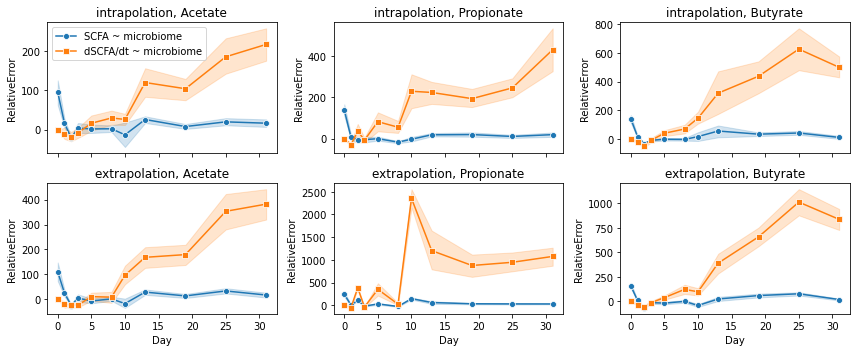

In [18]:
fig, ax = plt.subplots(figsize=(12,5), nrows=2, ncols=3, sharex=True)

for k1, perturbation in enumerate(['intrapolation','extrapolation']):
    for k2, scfa_ in enumerate(['Acetate','Propionate','Butyrate']):
        curr_df_model1 = df_model1[(df_model1.Perturbation==perturbation)&(df_model1.SCFA_mol==scfa_)]
        curr_df_model2 = df_model2[(df_model2.Perturbation==perturbation)&(df_model2.SCFA_mol==scfa_)]
        curr_df_model3 = df_model3[(df_model3.Perturbation==perturbation)&(df_model3.SCFA_mol==scfa_)]
        ax[k1,k2].set_title('%s, %s'%(perturbation, scfa_))
        _ = sns.lineplot(x='Day', y='RelativeError', ci=68, marker='o', data=curr_df_model1, ax=ax[k1,k2], label='SCFA ~ microbiome')
        _ = sns.lineplot(x='Day', y='RelativeError', ci=68, marker='s', data=curr_df_model2, ax=ax[k1,k2], label='dSCFA/dt ~ microbiome')
        #_ = sns.lineplot(x='Day', y='RelativeError', ci=68, marker='s', data=curr_df_model3, ax=ax[k1,k2], label='dSCFA/dt ~ dmicrobiome/dt')
        if k1!=0 or k2!=0:
            ax[k1,k2].legend().remove()
        
#         if k1==0:
#             _ = ax[k1,k2].set_ylim([-60,600])
#         if k1==1:
#             _ = ax[k1,k2].set_ylim([-300,3000])
#         if k1==2:
#             _ = ax[k1,k2].set_ylim([-150,1500])

# plt.rcParams['svg.fonttype'] = 'none'
# fig.savefig("comp_relerror_deriv_vs_conc.svg", format="svg")
plt.tight_layout()